In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sxb = pd.read_csv('sxb.csv', sep=';')

# Delete 'NaN' Rows
NullRows = sxb[sxb.isna().any(axis=1)]
sxb = sxb.dropna(how='all')


In [3]:
pd.set_option("max_rows", None)
sxb['MOIS'] = sxb['NOTIFICATION_DATE'].str[5:7].astype(int)
sxb['MONTANT'] = pd.to_numeric(sxb['MONTANT'],errors='coerce')

In [4]:
seuil = 400000.0

mois = range(1, 13)
depenses_par_mois = sxb.groupby('MOIS').sum()

# Regroupement par prestataire de services
depenses_par_prestataire = sxb.groupby('TITULAIRES_DENOMINATION').sum()
top_depenses_par_prestataire = depenses_par_prestataire[depenses_par_prestataire['MONTANT'] > seuil]
top_depenses_par_prestataire = top_depenses_par_prestataire.reset_index()
prestataires = top_depenses_par_prestataire['TITULAIRES_DENOMINATION']
montant = top_depenses_par_prestataire['MONTANT']


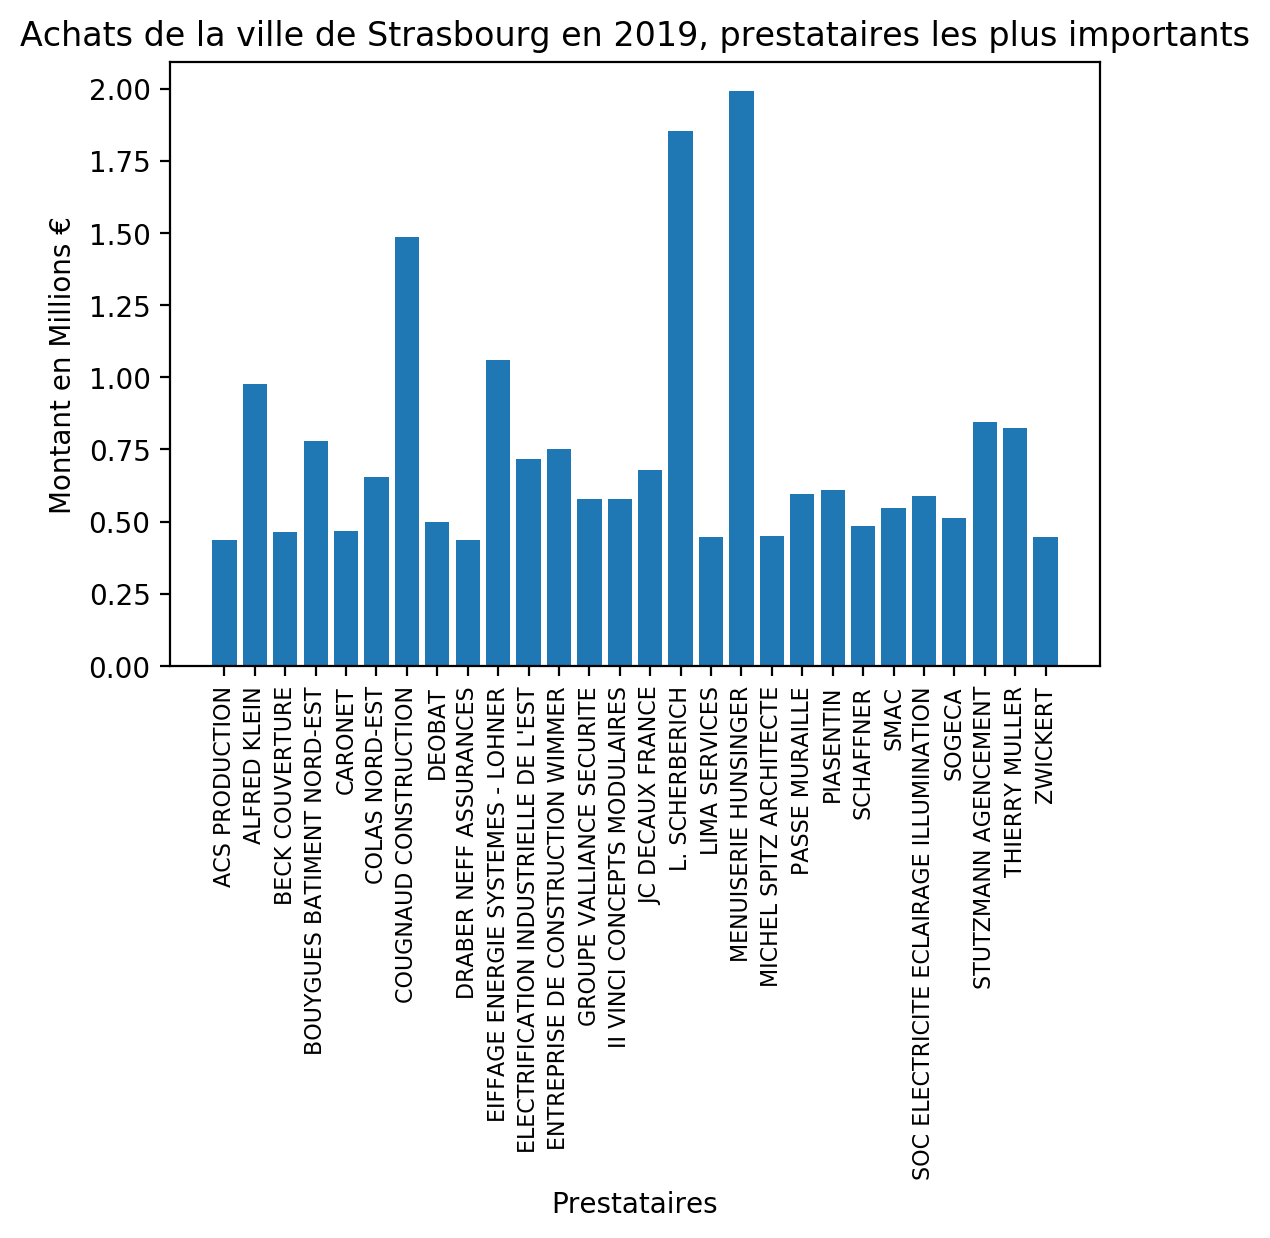

In [5]:
plt.figure(dpi=200)
plt.bar(prestataires, montant / 10**6)
plt.xticks(prestataires, rotation='90', fontsize=8)
plt.xlabel('Prestataires')
plt.ylabel('Montant en Millions €')
plt.title('Achats de la ville en 2019, prestataires les plus importants')
plt.show()

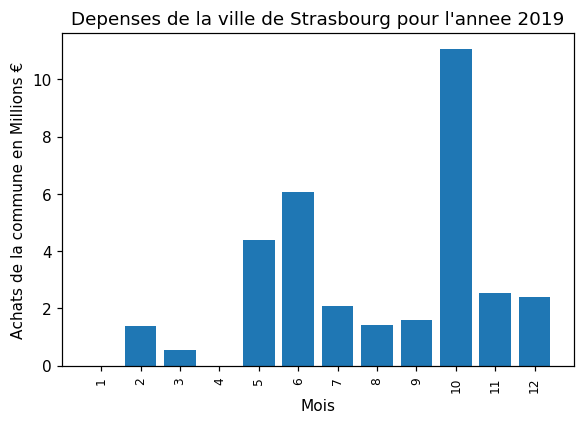

In [32]:
plt.figure(dpi=200)
plt.bar(mois, depenses_par_mois['MONTANT'] / 10**6)
plt.xticks(mois, rotation='vertical', fontsize=8)
plt.title('Achats de la ville de Strasbourg en 2019, par mois')
plt.xlabel('Mois')
plt.ylabel('Montant en Millions €')
plt.show()

In [34]:
depenses_par_projet = sxb.groupby('MARCHE_OBJET').sum()
top_depenses_par_projet = depenses_par_projet[depenses_par_projet['MONTANT'] > seuil]
top_depenses_par_projet = top_depenses_par_projet.reset_index()

In [35]:
top_projets = top_depenses_par_projet['MARCHE_OBJET']

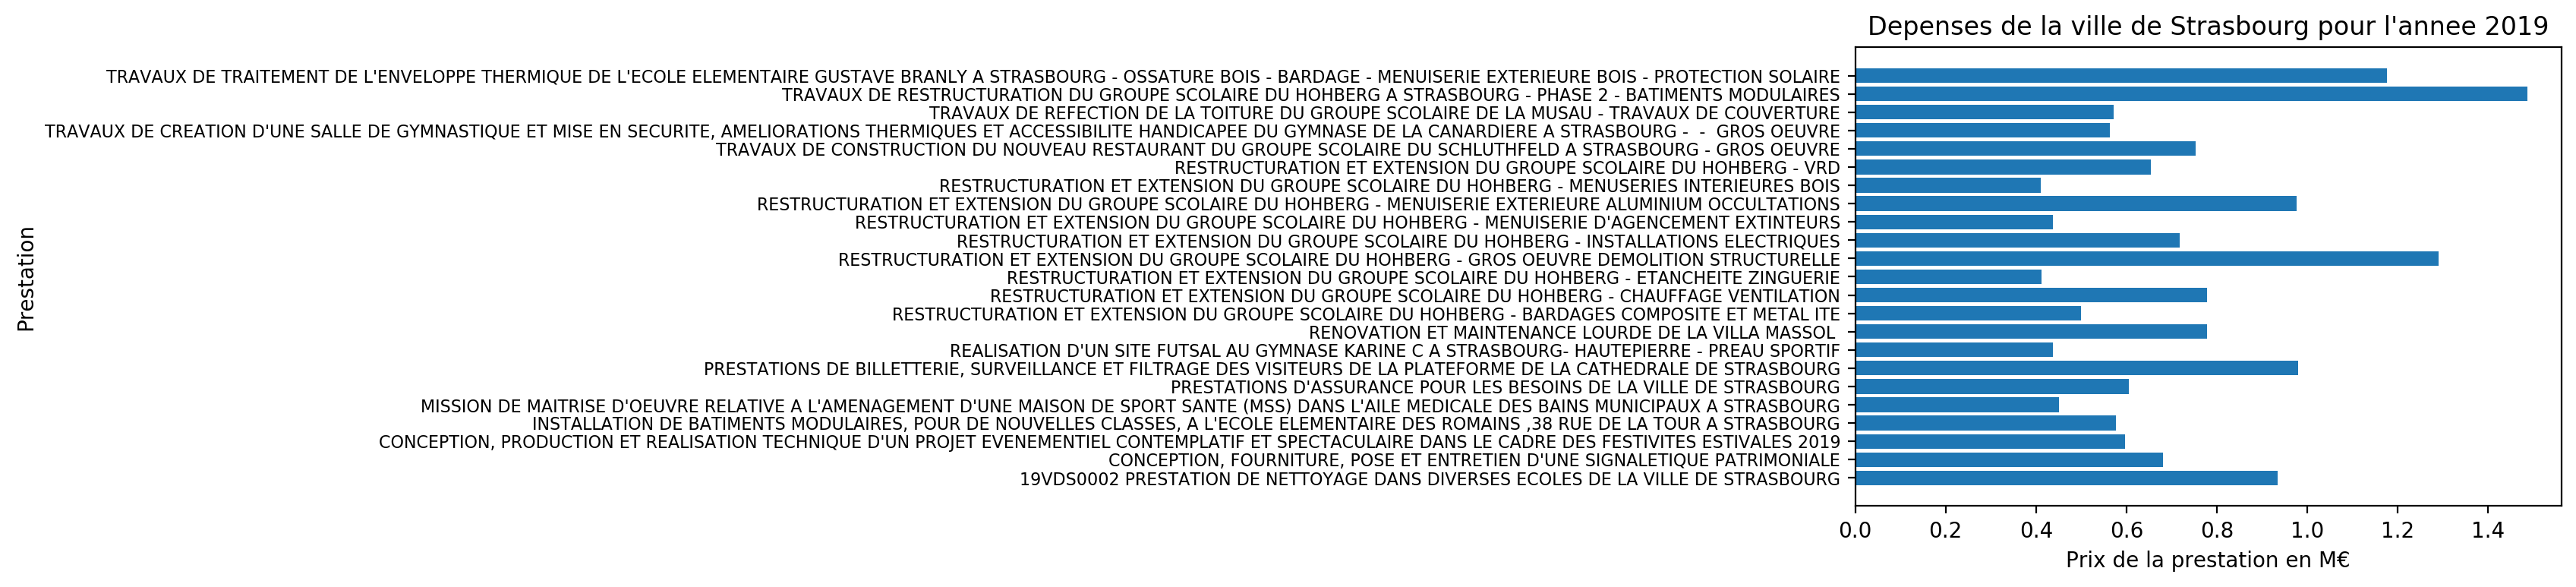

In [38]:
plt.figure(dpi=200)
plt.barh(top_projets, top_depenses_par_projet['MONTANT'] / 10**6)
plt.title('Achats de la ville de Strasbourg en 2019, par projets les plus importants')
plt.yticks(top_projets, fontsize=8)
plt.ylabel('Intitule de la prestation')
plt.xlabel('Prix de la prestation en M€')
plt.show()